# <center>Car Price Prediction

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Data Overview

In [2]:
df = pd.read_csv('train-data.csv')
test=pd.read_csv('test-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
              Data type for Mileage , Engine and Power columns need to be fixed.
    they should be float not object.this could be achieved by removing the units (kmpl , cc , bhp).
</p>
</div>

# Data Cleaning

In [4]:
round((df.isna().sum()/len(df))*100,2)

Unnamed: 0            0.00
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.60
Power                 0.60
Seats                 0.70
New_Price            86.31
Price                 0.00
dtype: float64

In [5]:
df.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)
test.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px; color:white;">
              New_Price column need to be dropped. missing values in other columns can be imputed. 
</p>
</div>

In [6]:
df.duplicated().sum()

0

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 No duplicates. Now let's fix data types for Mileage , Engine and power columns.
    
</p>
</div>

In [7]:
df['Mileage'] = df['Mileage'].str.split(expand=True)[0].astype(float)
df['Engine'] = df['Engine'].str.split(expand=True)[0].astype(float)
test['Mileage'] = test['Mileage'].str.split(expand=True)[0].astype(float)
test['Engine'] = test['Engine'].str.split(expand=True)[0].astype(float)

In [8]:
(df['Power'] == 'null bhp').sum()
(test['Power'] == 'null bhp').sum()

22

In [9]:
df['Power'] = df['Power'].replace('null bhp',None)
df['Power'] = df['Power'].str.split(expand=True)[0].astype(float)
test['Power'] = test['Power'].replace('null bhp',None)
test['Power'] = test['Power'].str.split(expand=True)[0].astype(float)

In [10]:
df.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3261,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kolkata,2013,60001,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,14.5


In [11]:
test.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
75,Chevrolet Beat LT,Chennai,2010,75422,Petrol,Manual,Second,18.6,1199.0,79.4,5.0


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Now the Data is ready for exploration.
              
</p>
</div>

In [12]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [13]:
test.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,1234.000000,1234.000000,1234.000000,1224.000000,1202.000000,1223.000000
mean,2013.400324,58507.288493,18.173857,1593.584967,110.380420,5.284546
std,3.179700,35598.702098,4.464615,564.347723,51.543818,0.825622
min,1996.000000,1000.000000,0.000000,624.000000,34.200000,2.000000
25%,2011.000000,34000.000000,15.215000,1198.000000,75.000000,5.000000
50%,2014.000000,54572.500000,18.250000,1461.000000,93.700000,5.000000
75%,2016.000000,75000.000000,21.100000,1968.000000,130.000000,5.000000
max,2019.000000,350000.000000,32.260000,5998.000000,616.000000,10.000000


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Kilometers_Driven ,Power ,Engine ,Price: these columns have outliers. Remove outliers while performing univariate analysis.
    <br>
    Mileage and Seats: these columns have zeros in some rows. 
    
    

</p>
</div>

In [14]:
df.select_dtypes('object').describe()

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,6019,6019,6019,6019,6019
unique,1876,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,49,790,3205,4299,4929


In [15]:
test.select_dtypes('object').describe()

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,1234,1234,1234,1234,1234
unique,768,11,4,2,4
top,Maruti Alto LXi,Mumbai,Diesel,Manual,First
freq,9,159,647,905,1023


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Name column has high cardinality. Can't drop it so can extract car model or Company from it.<br>
<br>If a column has high cardinality, it may be challenging to analyze the data in its current form. However, dropping the column altogether may lead to loss of important information. Instead, it may be useful to extract relevant information from the column, such as car model or brand, which can be used for further analysis.
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Now let's Remove Outliers   </p>
</div>

In [16]:
for col in ['Engine','Power','Kilometers_Driven','Mileage','Price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5*IQR
    upper_bound = Q3 + 2.5*IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Feature Engineering

In [17]:
df['Name'].nunique()

1633

In [18]:
df['Company'] = df['Name'].str.split(expand=True)[0].str.lower()
df['Model'] = df['Name'].str.split().str[0:2].str.join(' ').str.lower()
df.drop(columns = ['Name'],inplace = True)
test['Company'] = test['Name'].str.split(expand=True)[0].str.lower()
test['Model'] = test['Name'].str.split().str[0:2].str.join(' ').str.lower()
test.drop(columns = ['Name'],inplace = True)

In [19]:
df['Company'].nunique() , df['Model'].nunique()

(26, 182)

In [20]:
test['Company'].nunique() , test['Model'].nunique()

(28, 161)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Now dataset have a new feature and can use it in training model.
</p>
</div>

# Univariate Analysis

In [21]:
# this function make the data fall in certain range.
def remove_outliers(df,col,lower,upper):
    df = df[ (df[col]>lower) & (df[col]<upper) ]
    return df

In [22]:
# this function plots histogram and boxplot for col parameter
def plot_num(df,col):
    fig ,ax = plt.subplots(1,2,figsize=(16,4))
    sns.histplot(df,x=col,kde=True,ax=ax[0])
    sns.boxplot(df,x=col,ax=ax[1])
    ax[0].set_title(f'Distribution of {col}')
    ax[1].set_title(f'{col} Boxplot')
    fig.show();

<h3>1. Year

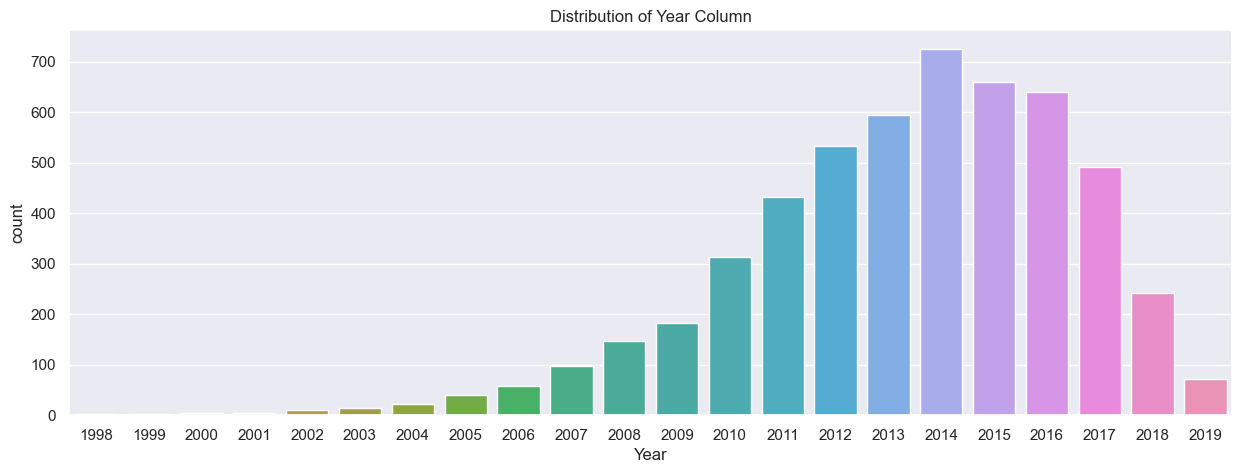

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(df,x='Year');
plt.title('Distribution of Year Column');

<h3>2. Kilometers Driven

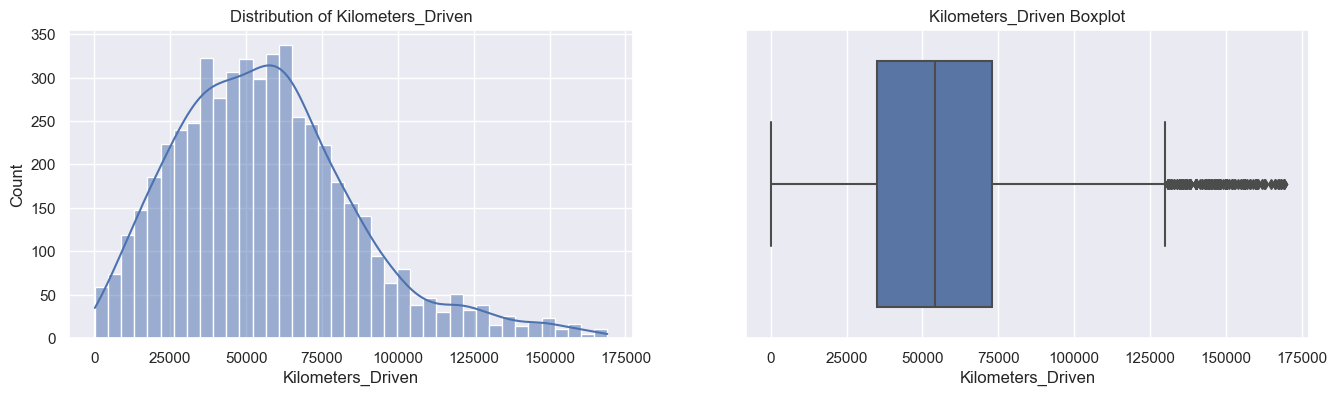

In [24]:
plot_num(df,'Kilometers_Driven')

<h3>3. Fuel Type

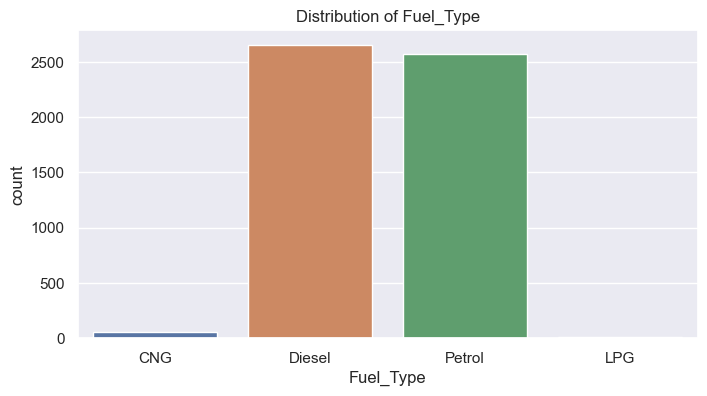

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Fuel_Type');
plt.title('Distribution of Fuel_Type');

In [26]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel    2656
Petrol    2573
CNG         55
LPG         10
Name: count, dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
To prevent modeling issues, exclude Fuel_Types with low frequency from the dataset.    
</p>
</div>

In [27]:
df = df[~df['Fuel_Type'].isin(['LPG','Electric'])]
test = test[~test['Fuel_Type'].isin(['LPG','Electric'])]

<h3>4. Transmission

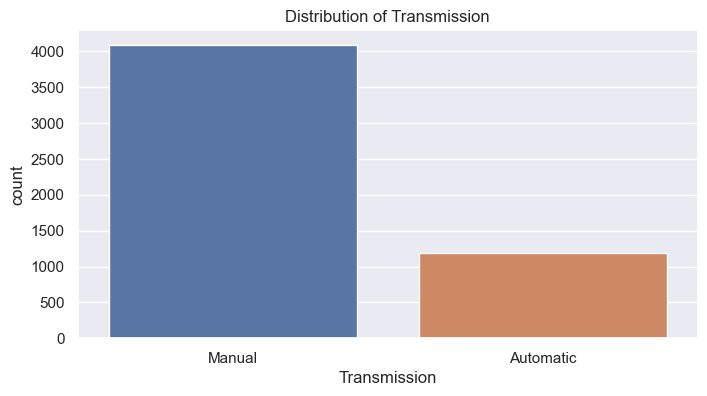

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Transmission');
plt.title('Distribution of Transmission');

In [29]:
df['Transmission'].value_counts()

Transmission
Manual       4090
Automatic    1194
Name: count, dtype: int64

<h3>5. Owner Type

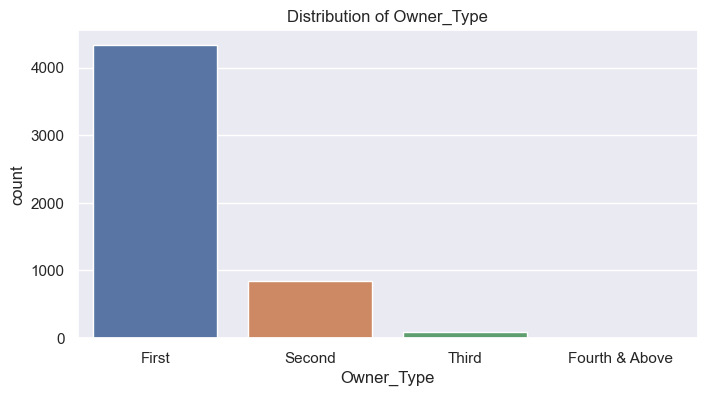

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Owner_Type');
plt.title('Distribution of Owner_Type');

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Owner_type is ordinal categorical feature that needs to be Encoded.
</p>
</div>

In [31]:
df['Owner_Type'] = df['Owner_Type'].map({"First":3,"Second":2,"Third":1,"Fourth & Above":0})
test['Owner_Type'] = test['Owner_Type'].map({"First":3,"Second":2,"Third":1,"Fourth & Above":0})

<h3>6. Mileage

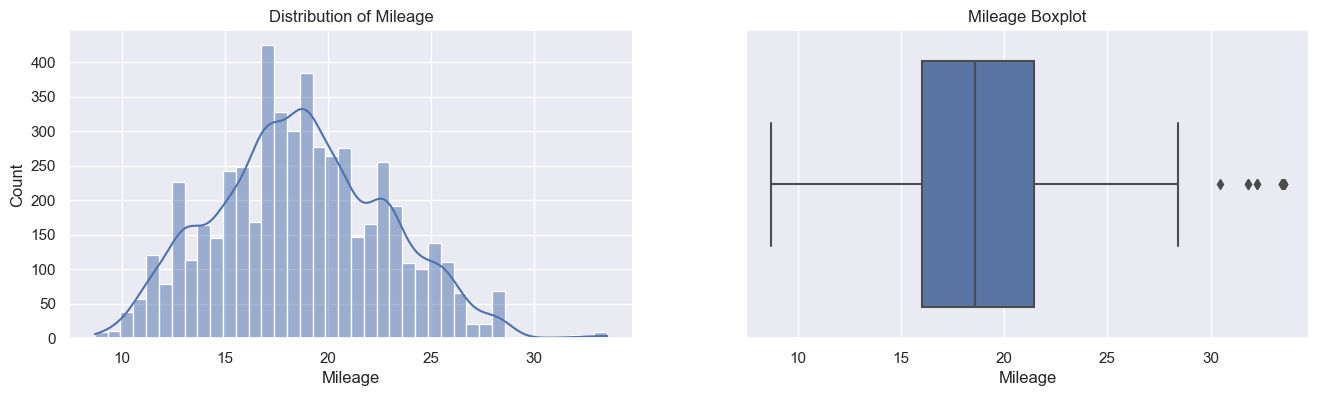

In [32]:
plot_num(df,'Mileage')

<h3>7. Engine

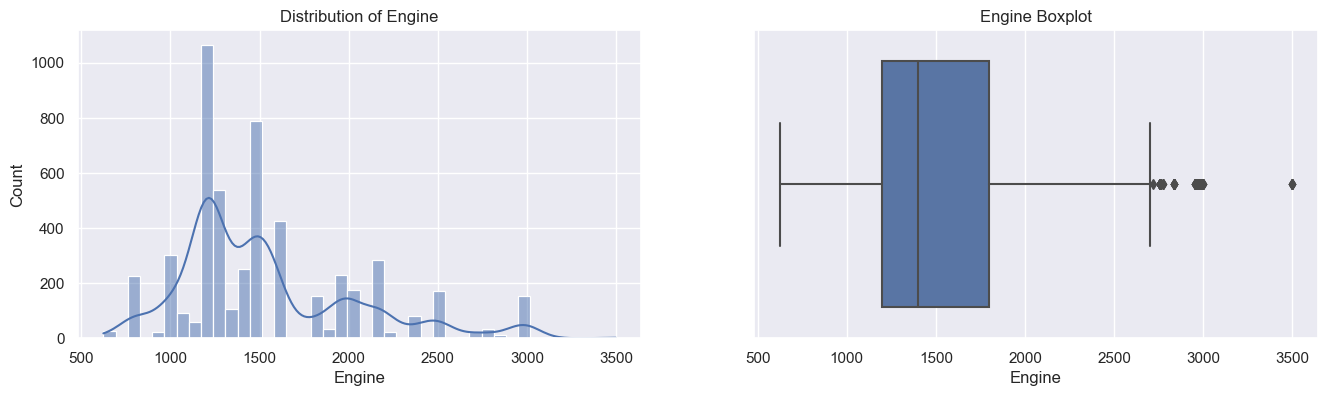

In [33]:
plot_num(df,'Engine')

<h3>8. Power

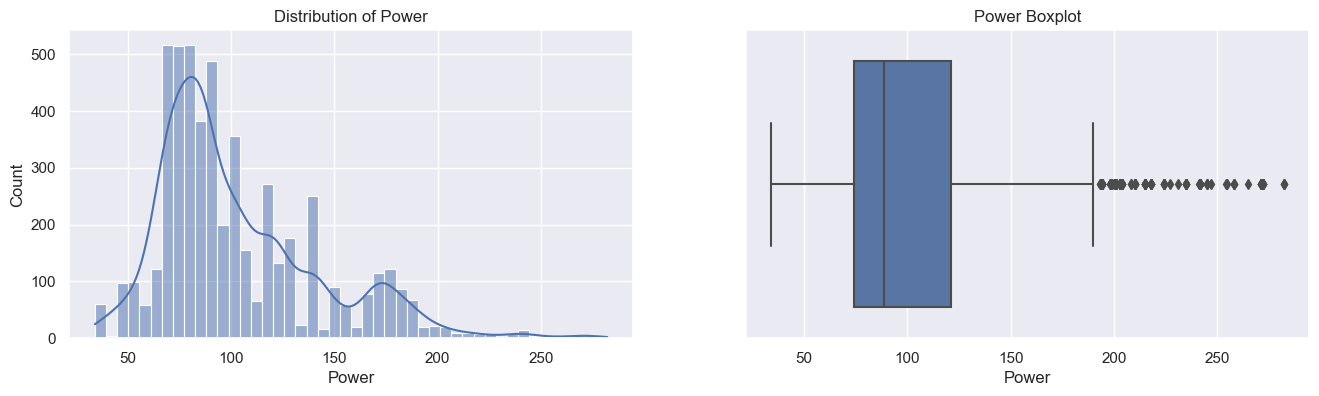

In [34]:
plot_num(df,'Power')

<h3>9. Seats

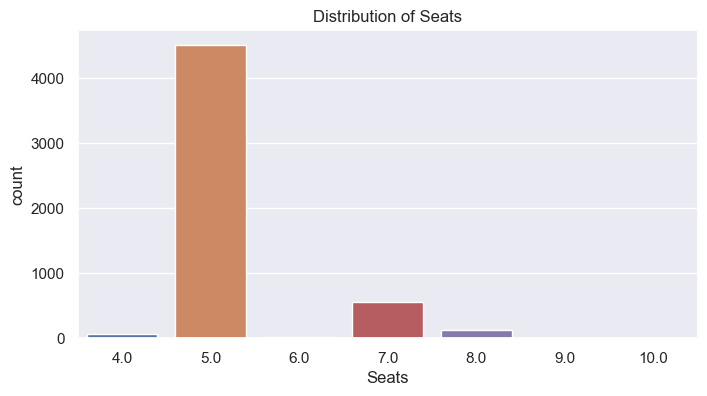

In [35]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Seats');
plt.title('Distribution of Seats');

In [36]:
df['Seats'].value_counts()

Seats
5.0     4509
7.0      558
8.0      121
4.0       62
6.0       26
10.0       4
9.0        3
Name: count, dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
To prevent modeling issues, exclude Seats with low frequency from the dataset.
    </p>
</div>

In [37]:
df = df[df.Seats.between(5,8)]
test = test[test.Seats.between(5,8)]

<h3>10. Company

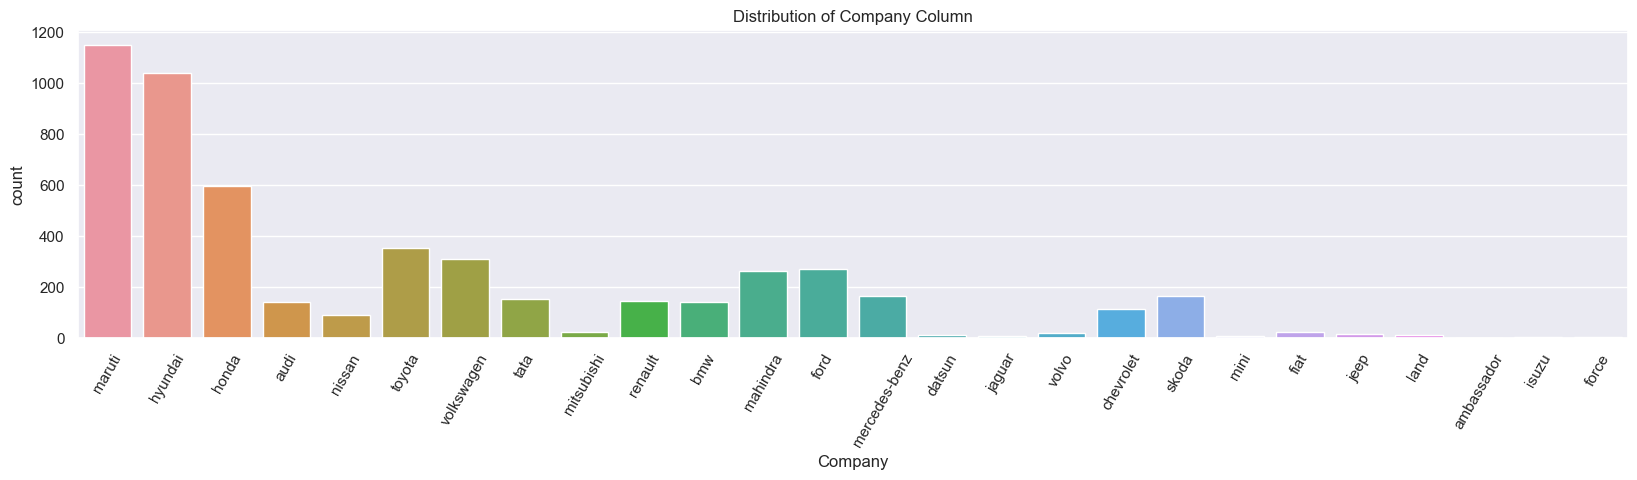

In [38]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Company');
plt.xticks(rotation=60)
plt.title('Distribution of Company Column');

<h3>11. Model

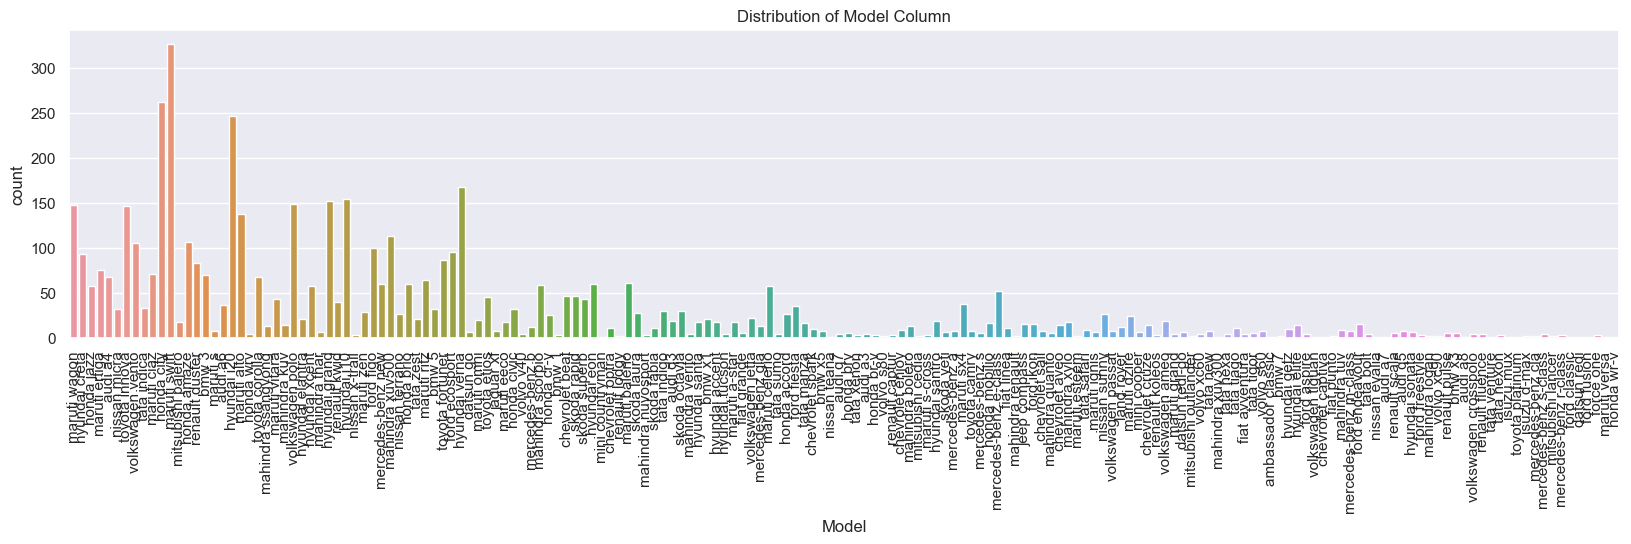

In [39]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Model',orient='h');
plt.xticks(rotation=90)
plt.title('Distribution of Model Column');

In [40]:
df.Model.value_counts()

Model
maruti swift         326
honda city           262
hyundai i20          246
hyundai verna        168
hyundai i10          154
                    ... 
volkswagen tiguan      1
audi a8                1
chevrolet captiva      1
nissan evalia          1
honda wr-v             1
Name: count, Length: 176, dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
To prevent modeling issues, exclude car models with low frequency from the dataset.    </p>
</div>

In [41]:
threshold = 10
counts = df.Model.value_counts()
to_drop = counts[counts<threshold].index.tolist()
df = df[~df['Model'].isin(to_drop)]

In [42]:
counts = test.Model.value_counts()
to_drop = counts[counts<threshold].index.tolist()
test = test[~test['Model'].isin(to_drop)]

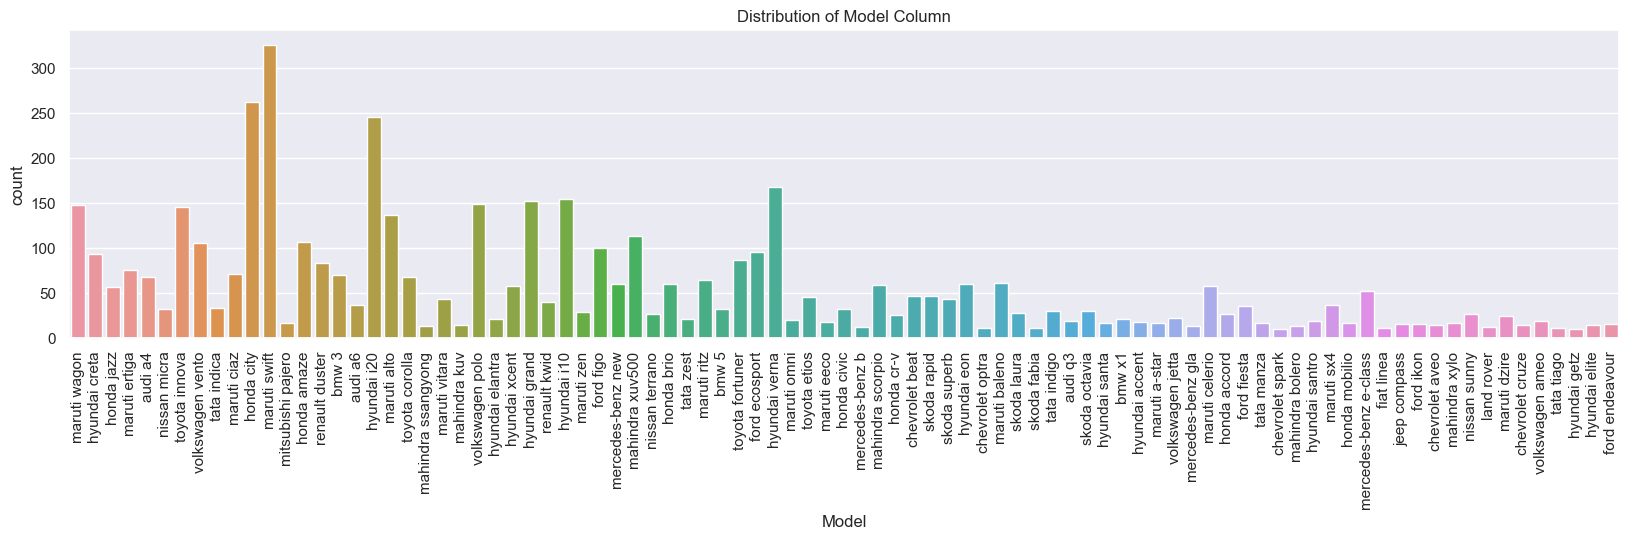

In [43]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Model',orient='h');
plt.xticks(rotation=90)
plt.title('Distribution of Model Column');

<h3>12. Location

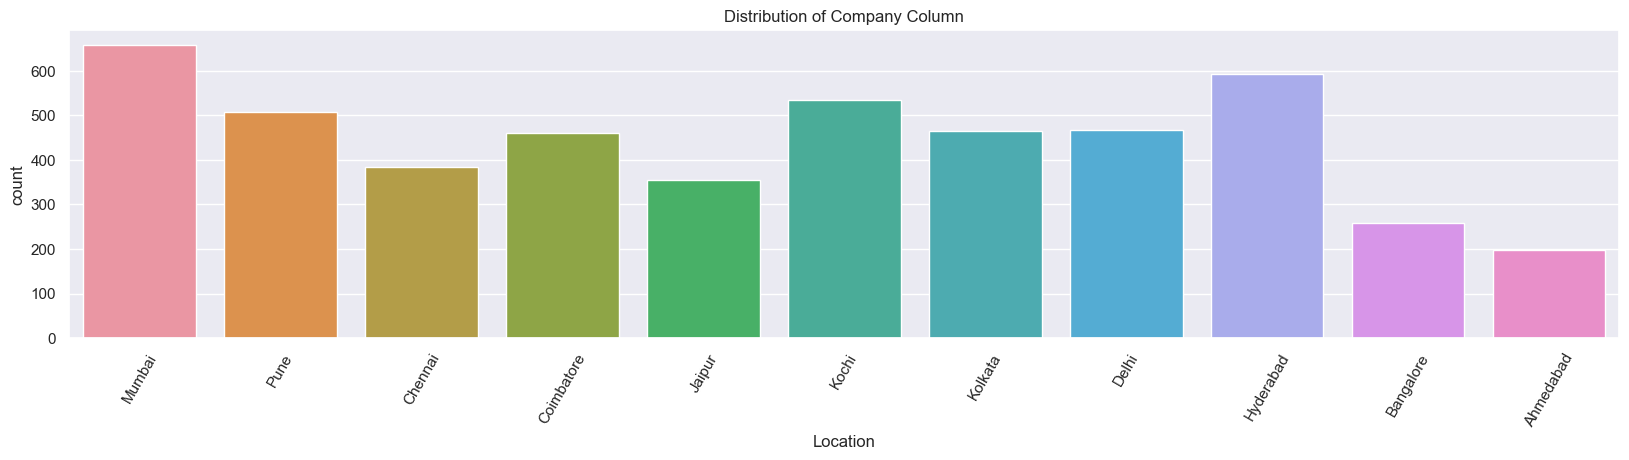

In [44]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Location');
plt.xticks(rotation=60)
plt.title('Distribution of Company Column');

<h3>13. Price

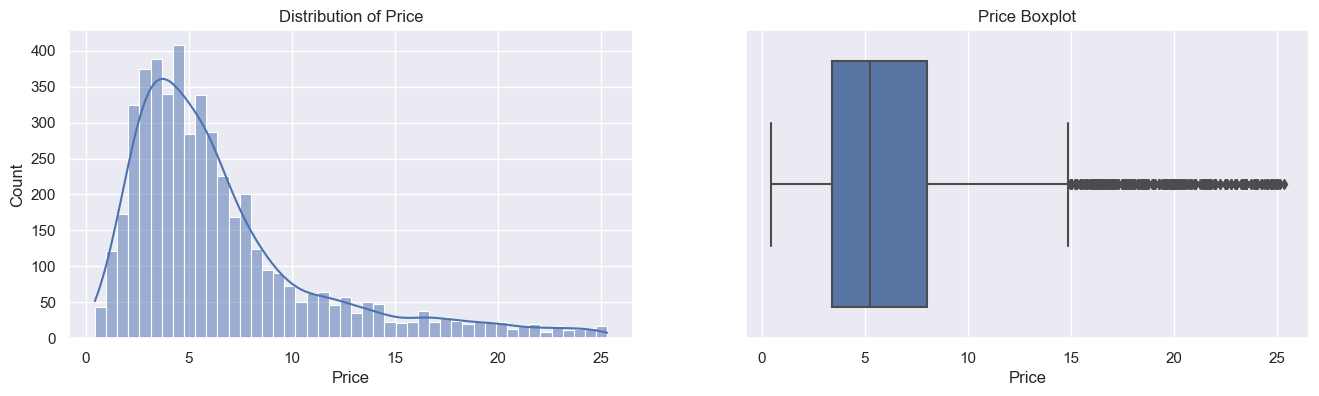

In [45]:
plot_num(df,'Price')

# Bivariate Analysis

In [46]:
agg = df.groupby('Year')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Year vs Mean Price')
fig.show()

In [47]:
fig = px.scatter(df,x='Kilometers_Driven',y='Price' , width=700 , height =500,title='Kilometers Driven vs Mean Price')
fig.show()

In [48]:
agg = df.groupby('Fuel_Type')['Price'].mean().sort_values(ascending = False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Fuel Type vs Mean Price')
fig.show()

In [49]:
agg = df.groupby('Transmission')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Transmission Type vs Mean Price')
fig.show()

In [50]:
agg = df.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Owner Type vs Mean Price')
fig.show()

In [51]:
fig = px.scatter(df,x='Mileage',y='Price' , width=700 , height =500,title='Mileage vs Mean Price')
fig.show()

In [52]:
fig = px.scatter(df,x='Engine',y='Price' , width=700 , height =500,title='Engine vs Mean Price')
fig.show()

In [53]:
fig = px.scatter(df,x='Power',y='Price' , width=700 , height =500,title='Power vs Mean Price')
fig.show()

In [54]:
agg = df.groupby('Seats')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Seats vs Mean Price')
fig.show()

In [55]:
agg = df.groupby('Company')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=900 , height =700,title='Company vs Mean Price')
fig.show()

In [56]:
agg = df.groupby('Location')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=900 , height =700,title='Location vs Mean Price')
fig.show()

In [57]:
 #sns.heatmap(df.corr(),annot=True)

# Building Model

In [58]:
from sklearn.model_selection import train_test_split,GridSearchCV ,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge ,Lasso 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler , OneHotEncoder,PolynomialFeatures 
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

# Data Splitting 

In [59]:
features = df.columns.drop(['Price'])
target = ['Price']

X = df[features]
y = df[target]

num_features = X.select_dtypes('number').columns
cat_features = X.select_dtypes('object').columns
print(num_features)
print(cat_features)

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats'],
      dtype='object')
Index(['Location', 'Fuel_Type', 'Transmission', 'Company', 'Model'], dtype='object')


In [60]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Data Preprocessing

In [61]:
#numerical pipeline
num_pipeline = make_pipeline(
                SimpleImputer(),
                StandardScaler(),
                PolynomialFeatures(degree=2)
)
#categorical pipeline
cat_pipeline = make_pipeline(
                SimpleImputer(strategy='most_frequent'),
                OneHotEncoder()
                
)
#full pipeline
preprocessor = make_column_transformer(
                (num_pipeline,num_features),
                (cat_pipeline,cat_features)
)

# Modeling

<h2>LinearRegression

In [62]:
#Model Building
lin_reg = make_pipeline(
            preprocessor,
            LinearRegression()
    )

In [63]:
#hyperparameter tunning
param_grid = {'columntransformer__pipeline-1__polynomialfeatures__degree':[2,3,4,5,6]}
Grid_search = GridSearchCV(    lin_reg, 
                               param_grid = param_grid,
                               cv = 5,
                               scoring='r2')
Grid_search.fit(X_train,y_train)
Grid_search.best_params_

{'columntransformer__pipeline-1__polynomialfeatures__degree': 2}

In [64]:
#Model Training
lin_reg.fit(X_train,y_train);

#measuring accuracy
pred_train = lin_reg.predict(X_train)
print("Training set Accuracy:",round(r2_score(pred_train,y_train),4)*100)
print("Testing set Accuracy:",round(lin_reg.score(X_test,y_test),4)*100)

#Cross validation
scores = cross_val_score(lin_reg,X,y,cv=5)
print("CV Scores Mean",round(scores.mean(),4)*100 )
print("CV Scores standard deviation",scores.std() )

Training set Accuracy: 93.97999999999999
Testing set Accuracy: 93.28999999999999
CV Scores Mean 93.58999999999999
CV Scores standard deviation 0.005754105176143383


In [65]:
pred_test = lin_reg.predict(test)
type(pred_test)
test['Price'] = pred_test


In [66]:
test['Price'].to_csv('predict-data.csv')


In [67]:
import pickle
# open a file, where you ant to store the data
file = open('linear_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lin_reg, file)

<h2>Ridge

In [68]:
#Model Building
ridge = make_pipeline(
            preprocessor,
            Ridge(alpha=0.01)
    )

In [69]:
#hyperparameter tunning
param_grid = {'ridge__alpha':[0.01,0.1,1,10,100],
             'columntransformer__pipeline-1__polynomialfeatures__degree':[2,3,4,5,6]}
Grid_search = GridSearchCV(    ridge, 
                               param_grid = param_grid,
                               cv = 5,
                               scoring='r2')
Grid_search.fit(X_train,y_train)
Grid_search.best_params_

{'columntransformer__pipeline-1__polynomialfeatures__degree': 2,
 'ridge__alpha': 0.1}

In [70]:
#Model Training
ridge.fit(X_train,y_train);

#measuring accuracy
pred_train = ridge.predict(X_train)
print("Training set Accuracy:",round(r2_score(pred_train,y_train),4)*100)
print("Testing set Accuracy:",round(ridge.score(X_test,y_test),4)*100)

#Cross validation
scores = cross_val_score(ridge,X,y,cv=5)
print("CV Scores Mean",round(scores.mean(),4)*100 )
print("CV Scores standard deviation",scores.std() )

Training set Accuracy: 93.97
Testing set Accuracy: 93.30000000000001
CV Scores Mean 93.58999999999999
CV Scores standard deviation 0.005761388641370896


In [71]:
import pickle
# open a file, where you ant to store the data
file = open('ridge_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(ridge, file)

<h2> Lasso

In [72]:
#Model Building
lasso = make_pipeline(
        preprocessor,
        Lasso(alpha=0.001)
)

In [73]:
#Hyperparameter Tunning
param_grid={
    "lasso__alpha":[0.001,0.01,0.1,1,10,100],
    "columntransformer__pipeline-1__polynomialfeatures__degree":[2,3,4,5]}
grid_search = GridSearchCV(
            lasso,
            param_grid=param_grid,
            scoring='r2',
            cv=5
)
grid_search.fit(X_train,y_train);
grid_search.best_params_

{'columntransformer__pipeline-1__polynomialfeatures__degree': 2,
 'lasso__alpha': 0.001}

In [74]:
#Model Training
lasso.fit(X_train,y_train);

#measuring accuracy
pred_train = lasso.predict(X_train)
print("Training set Accuracy:",round(r2_score(pred_train,y_train),4)*100)
print("Testing set Accuracy:",round(lasso.score(X_test,y_test),4)*100)

#Cross validation
scores = cross_val_score(lasso,X,y,cv=5)
print("CV Scores Mean",round(scores.mean(),4)*100 )
print("CV Scores standard deviation",scores.std() )

Training set Accuracy: 93.60000000000001
Testing set Accuracy: 93.02
CV Scores Mean 93.35
CV Scores standard deviation 0.006755917879658816


In [75]:
import pickle
# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso, file)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Conclusion : LinearRegression performs better on both train and test sets.
</p>
</div>